In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Data preparation

In [5]:
neg_df = pd.read_csv("negative.csv")
neg_df = neg_df.loc[:7500]
pos_df = pd.read_csv("positive.csv")
pos_df = pos_df.loc[:7500]

df = pd.concat([pos_df,neg_df])
df.reset_index(drop=True, inplace=True)

In [6]:
from nltk.tokenize import word_tokenize
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def lemmatization(text):
    # lemmatization refers to the process of reducing each word to its root or base.
    # For example “fishing,” “fished,” “fisher” all reduce to the stem “fish.”
    word_list = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()
    text = ' '.join([lemmatizer.lemmatize(w) for w in word_list])
    
    return text


# def stemming(text):
#     tokens = word_tokenize(text)
#     porter = PorterStemmer()
#     stemmed = [porter.stem(word) for word in tokens]
    
#     return " ".join(stemmed)


def filter_out_stop_words(text):
    # Stop words are those words that do not contribute to the deeper meaning of the phrase.
    # They are the most common words such as: “the“, “a“, and “is“
    tokens = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    words = [w for w in tokens if not w in stop_words]
    
    return " ".join(words)


def filter_out_punctuation(text):
    # We can filter out all tokens that we are not interested in, such as all standalone punctuation.
    # This can be done by iterating over all tokens and only keeping those tokens that are all alphabetic
    tokens = word_tokenize(text)
    words = [word for word in tokens if word.isalpha()]
    
    return " ".join(words)


def contraction_mapping(text):
    # Contractions are formed when words are shortened by omitting one or more letters
    contraction_mapping_text = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", "couldn't": "could not",
                           "didn't": "did not", "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", "haven't": "have not",
                           "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",
                           "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would",
                           "i'd've": "i would have", "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would",
                           "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam",
                           "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have",
                           "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have","o'clock": "of the clock",
                           "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have",
                           "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", "she's": "she is",
                           "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                           "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would",
                           "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have",
                           "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have",
                           "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are",
                           "we've": "we have", "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",
                           "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is",
                           "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have",
                           "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have",
                           "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all",
                           "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                           "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have",
                           "you're": "you are", "you've": "you have"}
    
    tokens = text.split(" ")
    return " ".join([contraction_mapping_text[t] if t in contraction_mapping_text else t for t in tokens]) 

In [7]:
import re

def data_preprocessing(text):    
    REPLACE_NO_SPACE = re.compile("[.;:!\'?,\"()\[\]]")
    REPLACE_WITH_SPACE = re.compile("(<br\s*/><br\s*/>)|(\-)|(\/)")

    text = contraction_mapping(text)
    text = REPLACE_NO_SPACE.sub("", text.lower())
    text = REPLACE_WITH_SPACE.sub(" ", text)
    
    text = lemmatization(text)
#     text = stemming(text)
    text = filter_out_stop_words(text)
    text = filter_out_punctuation(text)
    
    return text

In [8]:
for idx, data in df.iterrows():    
    df.loc[idx, "text"] = data_preprocessing(df.loc[idx, "text"])

# Train - test - val split

In [9]:
from sklearn.model_selection import train_test_split

test_size = 0.2

X_train, X_test, y_train, y_test = train_test_split(df["text"], df["sentiment"], stratify=df["sentiment"], test_size=test_size, random_state=4)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=test_size, random_state=4)

In [10]:
print("y_training\n", np.array(np.unique(y_train, return_counts=True)).T, "\n")
print("y_test\n", np.array(np.unique(y_test, return_counts=True)).T, "\n")
print("y_val\n", np.array(np.unique(y_val, return_counts=True)).T, "\n")

y_training
 [[   0 4800]
 [   1 4800]] 

y_test
 [[   0 1501]
 [   1 1500]] 

y_val
 [[   0 1200]
 [   1 1201]] 



# Convert a collection of raw documents to a matrix of TF-IDF features.
Algoritma TF-IDF (Term Frequency – Inverse Document Frequency) adalah salah satu algoritma yang dapat digunakan untuk menganalisa hubungan antara sebuah frase/kalimat dengan sekumpulan dokumen.
Inti utama dari algoritma ini adalah melakukan perhitungan nilai TF dan nilai IDF dari sebuah setiap kata kunci terhadap masing-masing dokumen.

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

# create the transform
vectorizer = TfidfVectorizer()
# tokenize and build vocab
vectorizer.fit(X_train)

X_train = vectorizer.transform(X_train)
X_train = X_train.toarray()

X_test = vectorizer.transform(X_test)
X_test = X_test.toarray()

X_val = vectorizer.transform(X_val)
X_val = X_val.toarray()

In [12]:
X_train.shape, X_test.shape

((9600, 51134), (3001, 51134))

# Logistic Regression model

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

c = 1
lr = LogisticRegression(C=c)
lr.fit(X_train, y_train)
pred = lr.predict(X_test)
print ("Accuracy for C=%s: %s" 
           % (c, accuracy_score(y_test, pred)))

/home/bagus/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy for C=1: 0.8753748750416528


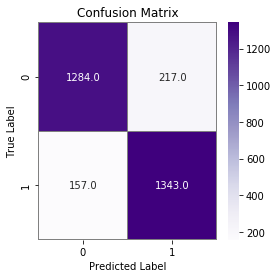

              precision    recall  f1-score   support

           0       0.89      0.86      0.87      1501
           1       0.86      0.90      0.88      1500

   micro avg       0.88      0.88      0.88      3001
   macro avg       0.88      0.88      0.88      3001
weighted avg       0.88      0.88      0.88      3001



In [21]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_test,pred)

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, np.around(pred), target_names=["0", "1"])
print(report)

In [23]:
origin_texts = ["""
Story line is make me bored a litle, not as i expected, too much singing part.
But still worth to watch especially if you like first movie.
""", 
                
"""
Frozen II felt unsatisfying. There was lots of build up to a very short climax that felt way too easy and simple. 
I kept expecting another adventure which never came. The film feels short and unfinished. 
That said, the animation is absolutely gorgeous and I did find the film quite funny. 
If you go into this with low expectations I think you'll enjoy yourself.
""",
                
"""
Went to see the movie with high expectations hoping that it would be as good as the first one. 
Found it to be a sleepy movie... the songs are awful and the storyline was a struggle.
I managed to fall asleep halfway of the movie.
""",

"""
I'm not sure why some people say it sucked. I went with my nephew and I thought the story was good and kept me intrigued throughout and had so many emotions, great visuals and was as good if not better than the first. 
I would def. Recommend this movie if you liked the 1st one! The characters from Frozen are awesome!
""", 
                
"""
Big, well crafted, exciting, meaningful... Every element in the film works beautifully, sound editing, cinematography, acting, costume, etc. 
Makes for such a fun an engaging film and it also holds truth and insight into the human condition and doesn't treat you like a child. 
A grown up, direct and well told story, made me nostalgic even for the old-Hollywood classics when directors where humble and made sure to stay out of the way in service of the story. 
I'll have this one on bluray for sure.
"""]

for origin_text in origin_texts:
    text = data_preprocessing(origin_text)

    val = vectorizer.transform([text])
    val = val.toarray()

    pred = model_d2v_01.predict_proba(val)
    if np.argmax(pred) == 0:
        print(origin_text, "**Result:", round(pred[0][np.argmax(pred)] * -1, 3), "negative sentiment")
    else: 
        print(origin_text, "**Result:", round(pred[0][np.argmax(pred)], 3), "positive sentiment")
    
    print("\n")


Story line is make me bored a litle, not as i expected, too much singing part.
But still worth to watch especially if you like first movie.
 **Result: -0.022 negative sentiment



Frozen II felt unsatisfying. There was lots of build up to a very short climax that felt way too easy and simple. 
I kept expecting another adventure which never came. The film feels short and unfinished. 
That said, the animation is absolutely gorgeous and I did find the film quite funny. 
If you go into this with low expectations I think you'll enjoy yourself.
 **Result: 0.005 positive sentiment



Went to see the movie with high expectations hoping that it would be as good as the first one. 
Found it to be a sleepy movie... the songs are awful and the storyline was a struggle.
I managed to fall asleep halfway of the movie.
 **Result: -0.973 negative sentiment



I'm not sure why some people say it sucked. I went with my nephew and I thought the story was good and kept me intrigued throughout and had so ma

# Neural Network model

In [15]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, Input
from tensorflow.keras.layers import Flatten
from tensorflow.keras.preprocessing import sequence

model_d2v_01 = Sequential()
model_d2v_01.add(Dense(512, activation='relu', input_dim=X_train.shape[1]))
model_d2v_01.add(Flatten())
model_d2v_01.add(Dense(256, activation='relu'))
model_d2v_01.add(Dense(128, activation='relu'))
model_d2v_01.add(Dense(64, activation='relu'))
model_d2v_01.add(Dense(32, activation='relu'))
model_d2v_01.add(Dense(2, activation='sigmoid'))
model_d2v_01.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

History = model_d2v_01.fit(X_train, y_train,
                 validation_data=(X_test, y_test),
                 epochs=10, batch_size=128)

Train on 9600 samples, validate on 3001 samples
Epoch 1/10
9600/9600 [==============================] - 20s 2ms/sample - loss: 0.4396 - accuracy: 0.7966 - val_loss: 0.3151 - val_accuracy: 0.8650
Epoch 2/10
9600/9600 [==============================] - 15s 2ms/sample - loss: 0.0774 - accuracy: 0.9741 - val_loss: 0.4072 - val_accuracy: 0.8624
Epoch 3/10
9600/9600 [==============================] - 15s 2ms/sample - loss: 0.0086 - accuracy: 0.9974 - val_loss: 0.6377 - val_accuracy: 0.8644
Epoch 4/10
9600/9600 [==============================] - 15s 2ms/sample - loss: 9.7713e-04 - accuracy: 0.9997 - val_loss: 0.7661 - val_accuracy: 0.8660
Epoch 5/10
9600/9600 [==============================] - 15s 2ms/sample - loss: 1.3947e-04 - accuracy: 1.0000 - val_loss: 1.0057 - val_accuracy: 0.8634
Epoch 6/10
9600/9600 [==============================] - 15s 2ms/sample - loss: 1.7761e-05 - accuracy: 1.0000 - val_loss: 1.1420 - val_accuracy: 0.8657
Epoch 7/10
9600/9600 [==============================] - 15

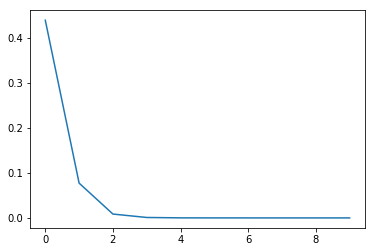

In [16]:
plt.plot(History.history['loss'])
plt.show()

In [13]:
# model_d2v_01.save("model_v5.h5")
from tensorflow.keras.models import load_model
 
# # # load model
model_d2v_01 = load_model('model_v4.h5')

# Testing

In [14]:
pred = model_d2v_01.predict(X_test)

# Model evaluation
scores = model_d2v_01.evaluate(X_test, y_test, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))

Accuracy: 86.74%


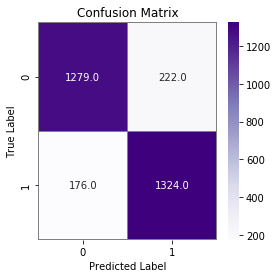

              precision    recall  f1-score   support

           0       0.88      0.85      0.87      1501
           1       0.86      0.88      0.87      1500

   micro avg       0.87      0.87      0.87      3001
   macro avg       0.87      0.87      0.87      3001
weighted avg       0.87      0.87      0.87      3001



In [15]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_test,np.argmax(pred, axis=1))

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_test, np.argmax(pred, axis=1), target_names=["0", "1"])
print(report)

# Validation

In [16]:
pred = model_d2v_01.predict(X_val)

# Model evaluation
scores = model_d2v_01.evaluate(X_val, y_val, verbose=0)
print("Accuracy: %.2f%%" % (scores[1]*100))
print(scores)

Accuracy: 88.67%
[1.0274543719011662, 0.88671386]


In [17]:
pred

array([[9.6606290e-01, 0.0000000e+00],
       [9.4793856e-01, 0.0000000e+00],
       [1.4901161e-07, 5.9947318e-01],
       ...,
       [4.7024786e-02, 3.5762787e-07],
       [0.0000000e+00, 9.8582220e-01],
       [0.0000000e+00, 9.9290061e-01]], dtype=float32)

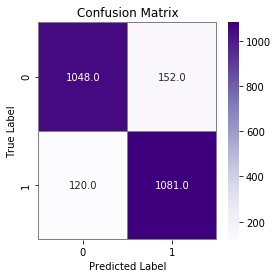

              precision    recall  f1-score   support

           0       0.90      0.87      0.89      1200
           1       0.88      0.90      0.89      1201

   micro avg       0.89      0.89      0.89      2401
   macro avg       0.89      0.89      0.89      2401
weighted avg       0.89      0.89      0.89      2401



In [18]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import seaborn as sns

cm = confusion_matrix(y_val,np.argmax(pred, axis=1))

f,ax = plt.subplots(figsize=(4, 4))
sns.heatmap(cm, annot=True, linewidths=0.01,cmap="Purples",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

report = classification_report(y_val, np.argmax(pred, axis=1), target_names=["0", "1"])
print(report)

# Inference

In [19]:
origin_texts = ["""
Story line is make me bored a litle, not as i expected, too much singing part.
But still worth to watch especially if you like first movie.
""", 
                
"""
Frozen II felt unsatisfying. There was lots of build up to a very short climax that felt way too easy and simple. 
I kept expecting another adventure which never came. The film feels short and unfinished. 
That said, the animation is absolutely gorgeous and I did find the film quite funny. 
If you go into this with low expectations I think you'll enjoy yourself.
""",
                
"""
Went to see the movie with high expectations hoping that it would be as good as the first one. 
Found it to be a sleepy movie... the songs are awful and the storyline was a struggle.
I managed to fall asleep halfway of the movie.
""",

"""
I'm not sure why some people say it sucked. I went with my nephew and I thought the story was good and kept me intrigued throughout and had so many emotions, great visuals and was as good if not better than the first. 
I would def. Recommend this movie if you liked the 1st one! The characters from Frozen are awesome!
""", 
                
"""
Big, well crafted, exciting, meaningful... Every element in the film works beautifully, sound editing, cinematography, acting, costume, etc. 
Makes for such a fun an engaging film and it also holds truth and insight into the human condition and doesn't treat you like a child. 
A grown up, direct and well told story, made me nostalgic even for the old-Hollywood classics when directors where humble and made sure to stay out of the way in service of the story. 
I'll have this one on bluray for sure.
"""]

for origin_text in origin_texts:
    text = data_preprocessing(origin_text)

    val = vectorizer.transform([text])
    val = val.toarray()

    pred = model_d2v_01.predict_proba(val)
    if np.argmax(pred) == 0:
        print(origin_text, "**Result:", round(pred[0][np.argmax(pred)] * -1, 3), "negative sentiment")
    else: 
        print(origin_text, "**Result:", round(pred[0][np.argmax(pred)], 3), "positive sentiment")
    
    print("\n")


Story line is make me bored a litle, not as i expected, too much singing part.
But still worth to watch especially if you like first movie.
 **Result: -0.022 negative sentiment



Frozen II felt unsatisfying. There was lots of build up to a very short climax that felt way too easy and simple. 
I kept expecting another adventure which never came. The film feels short and unfinished. 
That said, the animation is absolutely gorgeous and I did find the film quite funny. 
If you go into this with low expectations I think you'll enjoy yourself.
 **Result: 0.005 positive sentiment



Went to see the movie with high expectations hoping that it would be as good as the first one. 
Found it to be a sleepy movie... the songs are awful and the storyline was a struggle.
I managed to fall asleep halfway of the movie.
 **Result: -0.973 negative sentiment



I'm not sure why some people say it sucked. I went with my nephew and I thought the story was good and kept me intrigued throughout and had so ma